In [1]:
import pandas as pd
from selenium import webdriver

In [2]:
browser = webdriver.Chrome('C:/Users/Amarnath/chromedriver.exe')
browser

<selenium.webdriver.chrome.webdriver.WebDriver (session="070c47974e13ab55ca86b7547b76477c")>

In [5]:
url = 'https://www.zomato.com/bangalore/great-food-no-bull'
browser.get(url)

# Collecting Restaurents Information

In [6]:
restaurents = pd.DataFrame(columns = ['Name', 'ID', 'URL'])
restaurent_names = browser.find_elements_by_css_selector('div.relative.top-res-box.entity-ads-snippet-track')
for restaurent in restaurent_names:
    name = restaurent.find_element_by_css_selector('div.res_title').text
    id = int(restaurent.get_attribute('data-entity-id'))
    url = restaurent.find_element_by_css_selector('div.ptop0.pbot0.pl10.pr10').find_element_by_tag_name('a').get_attribute('href')
    restaurents = restaurents.append({'Name':name, 'ID':id, 'URL':url},
                                     ignore_index = True)
restaurents.head()

,Name,ID,URL
0,Brewklyn Microbrewery,18426381,https://www.zomato.com/bangalore/brewklyn-micr...
1,Chinita Real Mexican Food,18608992,https://www.zomato.com/bangalore/chinita-real-...
2,Burma Burma,18625420,https://www.zomato.com/bangalore/burma-burma-i...
3,Hunger Camp,18783527,https://www.zomato.com/bangalore/hunger-camp-j...
4,The Old Fashioned Bar,18744326,https://www.zomato.com/bangalore/the-old-fashi...


# Collecting Reviews for each restaurent

In [7]:
import time
Reviews = pd.DataFrame(columns = ['Restaurent_Name', 'Restaurent_ID', 'User_Name', 'User_ID', 'Rating'])
for index, row in restaurents.iterrows():
    browser.get(row['URL'])
    try:
        while True:
            browser.find_element_by_css_selector('div.ui.segment.clearfix.zs-load-more.res-page-load-more').click()
            time.sleep(2)
    except:
        users = browser.find_elements_by_css_selector('div.ui.segment.clearfix.brtop')
    for user in users:
        Reviews = Reviews.append({'Restaurent_Name':row['Name'], 'Restaurent_ID':row['ID'], 'User_Name':user.find_element_by_css_selector('div.header.nowrap.ui.left').find_element_by_css_selector('a').text,
                                 'User_ID':int(user.find_element_by_css_selector('div.header.nowrap.ui.left').find_element_by_css_selector('a').get_attribute('data-entity_id')),
                                 'Rating':float(user.find_element_by_css_selector('div.ttupper.fs12px.left.bold.zdhl2.tooltip').get_attribute('aria-label').split(' ')[1])},
                                ignore_index = True)


In [23]:
Reviews.head()

,Restaurent_Name,Restaurent_ID,User_Name,User_ID,Rating
0,Brewklyn Microbrewery,18426381,Isha Kaur,36363182,4.0
1,Brewklyn Microbrewery,18426381,Shreyas,27720568,4.0
2,Brewklyn Microbrewery,18426381,Aaghran Ghosh,245984,4.0
3,Brewklyn Microbrewery,18426381,Didon Clinton Dsouza,37440297,5.0
4,Brewklyn Microbrewery,18426381,Anant :),39373492,4.0


In [19]:
Reviews['Restaurent_Name'].unique()

array(['Brewklyn Microbrewery', 'Chinita Real Mexican Food',
       'Burma Burma', 'Hunger Camp', 'The Old Fashioned Bar', 'Foxtrot',
       'Mugful Of Stories', 'Namma SLN', 'Zamindar', 'Lot Like Crepes',
       'Lavonne', 'Avista Cafe Pizzeria', 'Jalsa Gold',
       'Olive Bar And Kitchen', 'Stoner', 'Hard Rock Cafe', 'CTR',
       'Imperio Restaurant', 'Sea Rock', 'Maziga', 'Milano Ice Cream',
       'The Hole in the Wall Cafe', 'Red Rhino', 'Toast & Tonic',
       "Brahmin's Coffee Bar", 'Sharon Tea Stall',
       "3B's - Buddies, Bar &...", 'nu.tree', 'Empire Restaurant',
       'BITEBOX', 'ANTIGRAVITY', 'Bamboo Hut', 'The Pizza Bakery',
       'Café Kaffea', 'Bengaluru Cafe', 'OPUS Club', '99 Pancakes',
       'The Asian Curry House', 'Siddiqu Kabab Center',
       'Soda Bottle Opener Wala', 'The Globe Grub', 'Brik Oven',
       'The Permit Room', 'Chikkanna Tiffin Room', 'Biergarten', 'MISU',
       'HOMMS', 'Big Pitcher', 'PurpleBasil.in', 'Dyu Art Cafe',
       'Delhi Highway'

# Writing Data to Excel File

In [25]:
from pandas import ExcelWriter

writer = ExcelWriter('zomato_restaurents.xlsx')
Reviews.to_excel(writer,'Sheet1')
writer.save()


In [7]:
import pandas as pd
import numpy as np

Ratings = pd.read_excel('D:/My Data/ML/Datasets/zomato_restaurents_reviews.xlsx')
Ratings.head()

,Restaurent_Name,Restaurent_ID,User_Name,User_ID,Rating
0,Brewklyn Microbrewery,18426381,Isha Kaur,36363182,4.0
1,Brewklyn Microbrewery,18426381,Shreyas,27720568,4.0
2,Brewklyn Microbrewery,18426381,Aaghran Ghosh,245984,4.0
3,Brewklyn Microbrewery,18426381,Didon Clinton Dsouza,37440297,5.0
4,Brewklyn Microbrewery,18426381,Anant :),39373492,4.0


# Number of Unique Restaurents

In [3]:
Ratings['Restaurent_Name'].nunique()

109

# Number of Unique Users

In [4]:
Ratings['User_Name'].nunique()

2931

# Number of Unique Ratings

In [5]:
Ratings['Rating'].nunique()

7

# Average rating for the restaurents

In [8]:
Avg_Rating = Ratings[['Restaurent_Name','Rating']].groupby('Restaurent_Name').agg({'Rating':np.mean}).reset_index()
Avg_Rating['Rating'] = round(Avg_Rating['Rating'], 1)
Avg_Rating.head()

,Restaurent_Name,Rating
0,1131 Bar + Kitchen,4.1
1,"3B's - Buddies, Bar &...",4.2
2,99 Pancakes,4.7
3,ANTIGRAVITY,4.2
4,Alba - JW Marriott Bengaluru,4.3


# Histogram showing the distribution of Ratings for the Restaurents

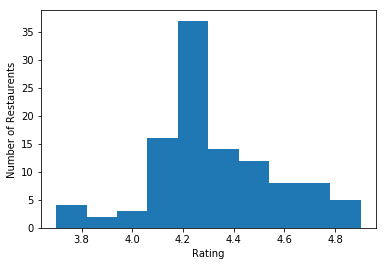

In [10]:
import matplotlib.pyplot as plt

plt.hist(Avg_Rating['Rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Restaurents')
plt.show()